In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_tabla = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bad-drivers/bad-drivers.csv')

In [ ]:
# Muestra las primeras 5 filas del DataFrame.
df_tabla.head()
# Obtén un resumen estadístico de las columnas numéricas.
df_tabla.describe()

In [ ]:
# Calcula la media, mediana y desviación estándar de la columna "Number of drivers involved in fatal collisions per billion miles
df_tabla["Number of drivers involved in fatal collisions per billion miles"].mean()
df_tabla["Number of drivers involved in fatal collisions per billion miles"].median()
df_tabla["Number of drivers involved in fatal collisions per billion miles"].std()


In [ ]:
# Filtra los estados con un "Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired" mayor al 30%
df_filtrado = df_tabla[df_tabla["Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired"] > 30]
print(df_filtrado)

In [ ]:
# Agrupa los datos por "State" y calcula la media de "Car Insurance Premiums ($)
df_tabla.groupby('State')['Car Insurance Premiums ($)'].mean()

In [ ]:
# Crea una nueva columna que calcule la relación entre "Car Insurance Premiums ($)" y "Losses incurred by insurance companies for collisions per insured driver ($)"
df_tabla["CarInsurance_LossesIncurred"] = df_tabla["Car Insurance Premiums ($)"] / df_tabla["Losses incurred by insurance companies for collisions per insured driver ($)"]

In [ ]:
# Ordena los datos por "Number of drivers involved in fatal collisions per billion miles" de manera descendente
df_sorted = df_tabla.sort_values(by="Number of drivers involved in fatal collisions per billion miles", ascending=False)
print(df_sorted)

In [ ]:
# Ordena los datos por "Car Insurance Premiums ($)" y luego por "Losses incurred by insurance companies for collisions per insured driver ($)".
df_ordenado = df_tabla.sort_values(by=['Car Insurance Premiums ($)', 'Losses incurred by insurance companies for collisions per insured driver ($)'])
print(df_ordenado)

In [ ]:
# Crear un gráfico de barras que muestre los "Car Insurance Premiums ($)" por estado
plt.figure(figsize=(10,8))
sns.barplot(data=df_tabla, x="Car Insurance Premiums ($)", y="State", palette="viridis")
plt.xlabel("Car Insurance Premiums ($)")
plt.ylabel("State")
plt.title("Car Insurance Premiums by State")
plt.tight_layout()
plt.show()


In [ ]:
# Crea un gráfico de barras apiladas para mostrar la distribución del "Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding" y 
# "Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired" por estado
df_grafico = df_tabla.set_index('State')[["Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding",
                                    "Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired"]]


plt.figure(figsize=(15,10))
df_grafico.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15,10))
plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Distribution of Drivers Involved in Fatal Collisions by State")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()


In [ ]:
# Crea un histograma de "Number of drivers involved in fatal collisions per billion miles
plt.figure(figsize=(10, 6))
# bins => cantidad de contenedores/ barras del histograma.
# kde Ayuda a visualizar mejor la forma general de la distribución de los datos
sns.histplot(data=df_tabla, x="Number of drivers involved in fatal collisions per billion miles", bins=15, kde=True)
plt.title("Number of drivers involved in fatal collisions per billion miles")
plt.xlabel("Number of drivers involved")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# Crea un boxplot para comparar la distribución de "Car Insurance Premiums ($)" entre los estados con "High Risk" y "Low Risk
# apply => función lambda que clasifica cada estado como "High Risk" o "Low Risk" basado en si su prima de seguro de automóvil es superior a la mediana global de todas las primas.
df_tabla['Risk Category'] = df_tabla['Car Insurance Premiums ($)'].apply(lambda x : 'High Risk' if x> df_tabla['Car Insurance Premiums ($)'].median()else 'Low Risk')
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tabla, x='Risk Category', y='Car Insurance Premiums ($)')
plt.title('Distribución de Car Insurance Premiums ($) entre los estados con High Risk y Low Risk')
plt.xlabel('Risk Category')
plt.ylabel('Car Insurance Premiums ($)')
plt.tight_layout()
plt.show()

In [ ]:
# Crea un gráfico de dispersión para visualizar la relación entre "Car Insurance Premiums ($)" y "Losses incurred by insurance companies for collisions per insured driver ($)".
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tabla, x="Car Insurance Premiums ($)", y="Losses incurred by insurance companies for collisions per insured driver ($)")
plt.xlabel('Car Insurance Premiums ($)')
plt.ylabel('Losses incurred by insurance companies for collisions per insured driver ($)')
plt.title('Relación entre Car Insurance Premiums ($) y Losses incurred by insurance companies')
plt.tight_layout()
plt.show()

In [ ]:
# Añade una línea de regresión al gráfico de dispersión anterior utilizando Seaborn.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tabla, x="Car Insurance Premiums ($)", y="Losses incurred by insurance companies for collisions per insured driver ($)")
# sns.regplot(): Esta función agrega una línea de regresión lineal al gráfico de dispersión
# scatter=False evita que se muestren los puntos de dispersión adicionales sobre la línea de regresión
sns.regplot(data=df_tabla, x="Car Insurance Premiums ($)", y="Losses incurred by insurance companies for collisions per insured driver ($)", scatter=False, color='r')
plt.xlabel('Car Insurance Premiums ($)')
plt.ylabel('Losses incurred by insurance companies for collisions per insured driver ($)')
plt.title('Relación entre Car Insurance Premiums ($) y Losses incurred by insurance companies con regresión')
plt.tight_layout()
plt.show()

In [ ]:
# Crea un heatmap para visualizar la correlación entre todas las columnas numéricas del DataFrame.
df_matriz_corr = df_tabla[["Number of drivers involved in fatal collisions per billion miles","Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding",
                           "Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired","Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted",
                           "Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents","Car Insurance Premiums ($)",
                           "Losses incurred by insurance companies for collisions per insured driver ($)"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data=df_matriz_corr,annot=True,cmap="coolwarm")
plt.show()

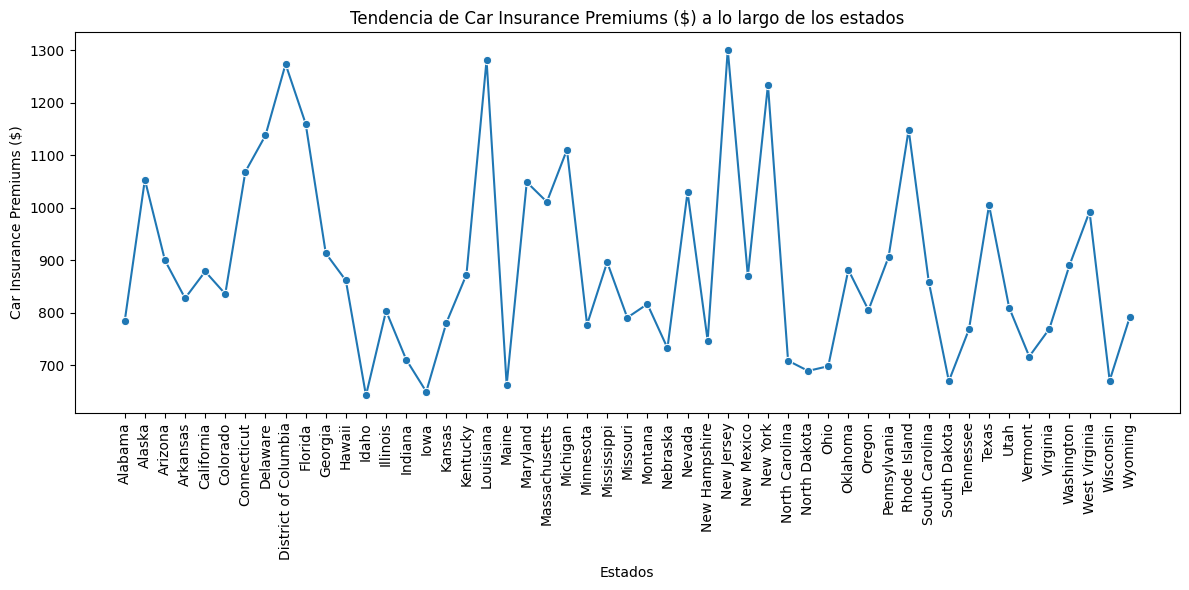

In [67]:
# Crea un gráfico de líneas para mostrar la tendencia de "Car Insurance Premiums ($)" a lo largo de los estados ordenados alfabéticamente
df_sorted = df_tabla.sort_values(by='State')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sorted, x='State', y='Car Insurance Premiums ($)', marker='o')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.xlabel('Estados')
plt.ylabel('Car Insurance Premiums ($)')
plt.title('Tendencia de Car Insurance Premiums ($) a lo largo de los estados')
plt.tight_layout()
plt.show()